<a href="https://colab.research.google.com/github/vivsarraf/Project-4/blob/Ajunjee/Project_4_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#  Import and read the csv.
import pandas as pd
sales_data_df = pd.read_csv("cleaned-property-sales-data_no-outliers.csv")
sales_data_df.head()

,Unnamed: 0,Bdrms,Baths_total,FinishedSqft,Lotsize,Sale_date,Year,Month,Sale_price
0,144,4,2,2200,128502,2021-11-23,2021,11,336000
1,179,2,2,1125,101059,2021-10-08,2021,10,250000
2,191,4,1,1471,95832,2022-08-12,2022,8,274900
3,226,4,3,2303,84071,2019-07-18,2019,7,237500
4,231,4,2,1247,81893,2023-06-01,2023,6,150000


In [244]:
sales_data_df = sales_data_df.rename(columns={'Bdrms':'Bedrooms', 'Baths_total': 'Bathrooms'})
sales_data_df.head()

,Unnamed: 0,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Sale_date,Year,Month,Sale_price
0,144,4,2,2200,128502,2021-11-23,2021,11,336000
1,179,2,2,1125,101059,2021-10-08,2021,10,250000
2,191,4,1,1471,95832,2022-08-12,2022,8,274900
3,226,4,3,2303,84071,2019-07-18,2019,7,237500
4,231,4,2,1247,81893,2023-06-01,2023,6,150000


In [245]:
sales_data_df.isnull().sum()

Unnamed: 0      0
Bedrooms        0
Bathrooms       0
FinishedSqft    0
Lotsize         0
Sale_date       0
Year            0
Month           0
Sale_price      0
dtype: int64

In [246]:
sales_data_df['Sale_date'] = pd.to_datetime(sales_data_df['Sale_date'], infer_datetime_format=True, format='mixed')
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20495 entries, 0 to 20494
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    20495 non-null  int64         
 1   Bedrooms      20495 non-null  int64         
 2   Bathrooms     20495 non-null  int64         
 3   FinishedSqft  20495 non-null  int64         
 4   Lotsize       20495 non-null  int64         
 5   Sale_date     20495 non-null  datetime64[ns]
 6   Year          20495 non-null  int64         
 7   Month         20495 non-null  int64         
 8   Sale_price    20495 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 1.4 MB


<ipython-input-246-dfecf60e65d3>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sales_data_df['Sale_date'] = pd.to_datetime(sales_data_df['Sale_date'], infer_datetime_format=True, format='mixed')


In [247]:
y = sales_data_df.Sale_price.values
X = sales_data_df.drop(columns = ['Unnamed: 0','Sale_price', 'Sale_date','Month'], axis=1)
X.head()


,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Year
0,4,2,2200,128502,2021
1,2,2,1125,101059,2021
2,4,1,1471,95832,2022
3,4,3,2303,84071,2019
4,4,2,1247,81893,2023


In [248]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=1)

In [249]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [250]:
# Define the the number of inputs (features) to the model
number_input_features = len(X.iloc[0])

# Review the number of features
number_input_features

5

In [251]:
# Define the number of neurons in the output layer
number_output_neurons = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 32

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 32

# Review the number hidden nodes in the second layer
hidden_nodes_layers = hidden_nodes_layer1 + hidden_nodes_layer2
hidden_nodes_layers

64

In [252]:
# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="linear"))

In [253]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                192       
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [254]:
# Compile the Sequential model
nn.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [255]:
# # Horrible accuracy for NN, please disregard
# # Fit the model using 100 epochs and the training data
# fit_model = nn.fit(X_train, y_train, epochs=10)

In [256]:
# # Evaluate the model loss and accuracy metrics using the evaluate method and the TRAIN data
# model_loss, model_accuracy = nn.evaluate(X_train_scaled, y_train,verbose=0)

# # Display the model loss and accuracy results
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [257]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("By using Linear Regression we got:")
print("Training data accuracy",lr_model.score(X_train, y_train))
print("Testing data accuracy",lr_model.score(X_test, y_test))

By using Linear Regression we got:
Training data accuracy 0.20745760266322533
Testing data accuracy 0.16460621975543677


In [258]:
# Failed, could not converge
# from sklearn.linear_model import LogisticRegression
# log_model = LogisticRegression()
# log_model.fit(X_train_scaled, y_train)

# print("By using Logistic Regression we got:")
# print("Training data accuracy",log_model.score(X_train_scaled, y_train))
# print("Testing data accuracy",log_model.score(X_test_scaled, y_test))

In [259]:
from sklearn.ensemble import RandomForestRegressor
rfm=RandomForestRegressor()
rfm.fit(X_train,y_train)

print("By using Random Forest Regression we got:")
print("Training data accuracy",rfm.score(X_train,y_train))
print("Testing data accuracy",rfm.score(X_test,y_test))

By using Random Forest Regression we got:
Training data accuracy 0.8836516704315782
Testing data accuracy 0.20873102212170114


In [260]:
rfm.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [261]:
rfm=RandomForestRegressor(max_depth=None,min_samples_leaf=5,min_samples_split=6,
                          n_estimators=150,verbose=2,n_jobs=-1)

In [262]:
rfm.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150building tree 30 of 150

building tree 31 of 150building tree 32 of 150

building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.2s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150building tree 82 of 150

building tree 83 of 150
building tree 84

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.7s finished


RandomForestRegressor(min_samples_leaf=5, min_samples_split=6, n_estimators=150,
                      n_jobs=-1, verbose=2)

In [263]:
print("By using Tuned Random Forest Regression we got:")
print("Training data accuracy",rfm.score(X_train,y_train))
print("Testing data accuracy",rfm.score(X_test,y_test))

By using Tuned Random Forest Regression we got:


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s


Training data accuracy 0.5726199903952087
Testing data accuracy 0.24275326748894632


[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.1s finished


In [264]:
y_pred = rfm.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.1s finished


In [265]:
# Calculating R2 value or Coefficient of Determination
test_set_r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination:",test_set_r2)

Coefficient of Determination: 0.24275326748894643


In [266]:
# Calculating MAE or Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 43675.15997999389


In [267]:
# Calculating RMSE or Root Mean Square Error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 55984.57730934375


In [268]:
# Comparing the MAE with Mean of the actual values (y_test)
print(f"The MAE is {(mae/np.mean(y_test))*100:.2f}% of Average of y_test ({np.mean(y_test):,.0f})")

The MAE is 24.73% of Average of y_test (176,602)


In [269]:
# Comparing the RMSE with Mean of the actual values (y_test)
print(f"The RMSE is {(rmse/np.mean(y_test))*100:.2f}% of Average of y_test ({np.mean(y_test):,.0f})")

The RMSE is 31.70% of Average of y_test (176,602)


In [270]:
# Comparing some of the individual actual values (y_test) with their respective predicted values (y_pred)
for i in range(50):
    print(f"y_test[{i}]: {y_test[i]:10,.0f}    y_pred[{i}]: {y_pred[i]:10,.0f}   Difference (% of y_test): {((y_pred[i]-y_test[i])/y_test[i])*100:6.2f}%")

y_test[0]:    229,000    y_pred[0]:    195,861   Difference (% of y_test): -14.47%
y_test[1]:    172,000    y_pred[1]:    131,315   Difference (% of y_test): -23.65%
y_test[2]:    112,000    y_pred[2]:    172,114   Difference (% of y_test):  53.67%
y_test[3]:    124,000    y_pred[3]:    110,794   Difference (% of y_test): -10.65%
y_test[4]:    105,000    y_pred[4]:    107,705   Difference (% of y_test):   2.58%
y_test[5]:    115,000    y_pred[5]:    202,372   Difference (% of y_test):  75.98%
y_test[6]:    141,900    y_pred[6]:    172,790   Difference (% of y_test):  21.77%
y_test[7]:    230,000    y_pred[7]:    146,801   Difference (% of y_test): -36.17%
y_test[8]:    136,500    y_pred[8]:    167,425   Difference (% of y_test):  22.66%
y_test[9]:    140,500    y_pred[9]:    123,414   Difference (% of y_test): -12.16%
y_test[10]:    195,000    y_pred[10]:    197,437   Difference (% of y_test):   1.25%
y_test[11]:     81,000    y_pred[11]:    131,956   Difference (% of y_test):  62.91%


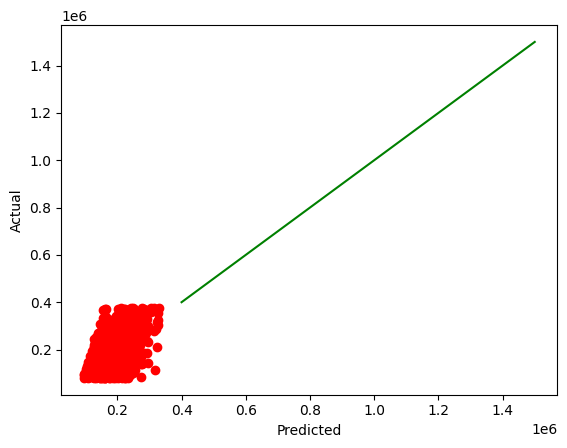

In [271]:
# Plotting graph between real and predicted values
plt.plot(y_pred,y_test,'ro')
plt.plot([400000,1500000],[400000,1500000], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [272]:
sales_data_df.head()

,Unnamed: 0,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Sale_date,Year,Month,Sale_price
0,144,4,2,2200,128502,2021-11-23,2021,11,336000
1,179,2,2,1125,101059,2021-10-08,2021,10,250000
2,191,4,1,1471,95832,2022-08-12,2022,8,274900
3,226,4,3,2303,84071,2019-07-18,2019,7,237500
4,231,4,2,1247,81893,2023-06-01,2023,6,150000


In [273]:
listings_data_df = pd.read_csv("original_extracted_df_MilwaukeeOnly.csv")
listings_data_df.head()

,State,City,Street,Zipcode,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,LotArea,ConvertedLot,LotUnit,MarketEstimate,RentEstimate,Price
0,WI,Milwaukee,North 26th STREET,53206,43.076214,-87.946370,4,2,NaN,NaN,3920.40,0.09,sqft,NaN,1425.0,7000
1,WI,Milwaukee,North 37th STREET,53210,43.066345,-87.959490,4,2,1714.0,20.361727,3484.80,0.08,sqft,NaN,1345.0,34900
2,WI,Milwaukee,North Sherman BOULEVARD UNIT 4326,53216,43.095818,-87.966620,4,2,1500.0,83.266667,0.62,0.62,acres,NaN,NaN,124900
3,WI,Milwaukee,North 25th STREET,53205,43.056957,-87.944756,3,2,1184.0,114.020270,4356.00,0.10,sqft,132800.0,1500.0,135000
4,WI,Milwaukee,North 86th PLACE,53225,43.121850,-88.019295,3,2,1271.0,106.215578,7840.80,0.18,sqft,136300.0,1875.0,135000


In [274]:
listings_data_df = listings_data_df.drop(columns=['PPSq', 'ConvertedLot','LotUnit','RentEstimate'], axis=1)
listings_data_df = listings_data_df[['Street', 'City', 'State', 'Zipcode', 'Latitude', 'Longitude', 'Bedroom', 'Bathroom', 'Area','LotArea', 'Price','MarketEstimate']]
listings_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Street          33 non-null     object 
 1   City            33 non-null     object 
 2   State           33 non-null     object 
 3   Zipcode         33 non-null     int64  
 4   Latitude        33 non-null     float64
 5   Longitude       33 non-null     float64
 6   Bedroom         33 non-null     int64  
 7   Bathroom        33 non-null     int64  
 8   Area            32 non-null     float64
 9   LotArea         28 non-null     float64
 10  Price           33 non-null     int64  
 11  MarketEstimate  26 non-null     float64
dtypes: float64(5), int64(4), object(3)
memory usage: 3.2+ KB


In [275]:
listings_data_df = listings_data_df.rename(columns={'Bedroom': 'Bedrooms', 'Bathroom':'Bathrooms','Area':'FinishedSqft', 'LotArea': 'Lotsize'})
listings_data_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate
0,North 26th STREET,Milwaukee,WI,53206,43.076214,-87.946370,4,2,NaN,3920.40,7000,NaN
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0


In [276]:
listings_data_df.isnull().sum()

Street            0
City              0
State             0
Zipcode           0
Latitude          0
Longitude         0
Bedrooms          0
Bathrooms         0
FinishedSqft      1
Lotsize           5
Price             0
MarketEstimate    7
dtype: int64

In [277]:
listings_data_df=listings_data_df.dropna(subset=['FinishedSqft','Lotsize'])
listings_data_df.isnull().sum()

Street            0
City              0
State             0
Zipcode           0
Latitude          0
Longitude         0
Bedrooms          0
Bathrooms         0
FinishedSqft      0
Lotsize           0
Price             0
MarketEstimate    4
dtype: int64

In [278]:
X.head()

,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Year
0,4,2,2200,128502,2021
1,2,2,1125,101059,2021
2,4,1,1471,95832,2022
3,4,3,2303,84071,2019
4,4,2,1247,81893,2023


In [279]:
prediction1_df = listings_data_df.copy()
prediction1_df['Year'] = 2024
prediction1_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate,Year
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,2024
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,2024
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,2024
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,2024
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,2024


In [282]:
prediction2_df = listings_data_df.copy()
prediction2_df['Year'] = 2026
prediction2_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate,2024 Forecasted House Price,2026 Forecasted House Price,2028 Forecasted House Price,Year
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,197196.262242,197196.262242,197196.262242,2026
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,203908.076893,203908.076893,203908.076893,2026
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,205733.482394,205733.482394,205733.482394,2026
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,218235.583942,218235.583942,218235.583942,2026
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,150150.075443,150150.075443,150150.075443,2026


In [283]:
prediction3_df = listings_data_df.copy()
prediction3_df['Year'] = 2028
prediction3_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate,2024 Forecasted House Price,2026 Forecasted House Price,2028 Forecasted House Price,Year
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,197196.262242,197196.262242,197196.262242,2028
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,203908.076893,203908.076893,203908.076893,2028
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,205733.482394,205733.482394,205733.482394,2028
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,218235.583942,218235.583942,218235.583942,2028
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,150150.075443,150150.075443,150150.075443,2028


In [281]:
X_pred1 = prediction1_df[['Bedrooms', 'Bathrooms','FinishedSqft', 'Lotsize','Year']]
y_predicted_sales1 = rfm.predict(X_pred1)
X_pred2 = prediction2_df[['Bedrooms', 'Bathrooms','FinishedSqft', 'Lotsize','Year']]
y_predicted_sales2 = rfm.predict(X_pred2)
X_pred3 = prediction3_df[['Bedrooms', 'Bathrooms','FinishedSqft', 'Lotsize','Year']]
y_predicted_sales3 = rfm.predict(X_pred3)

listings_data_df['2024 Forecasted House Price'] = y_predicted_sales1
listings_data_df['2026 Forecasted House Price'] = y_predicted_sales2
listings_data_df['2028 Forecasted House Price'] = y_predicted_sales3

listings_data_df

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.0s finished


,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate,2024 Forecasted House Price,2026 Forecasted House Price,2028 Forecasted House Price
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,197196.262242,197196.262242,197196.262242
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,203908.076893,203908.076893,203908.076893
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,205733.482394,205733.482394,205733.482394
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,218235.583942,218235.583942,218235.583942
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,150150.075443,150150.075443,150150.075443
6,North 17th STREET NORTH North,Milwaukee,WI,53206,43.069004,-87.934100,3,2,902.0,0.00,140000,NaN,213233.299114,213233.299114,213233.299114
7,West Eden PLACE,Milwaukee,WI,53220,42.980330,-88.002720,3,1,1156.0,7840.80,144900,157300.0,151789.926983,151789.926983,151789.926983
8,South 8th STREET,Milwaukee,WI,53215,42.996044,-87.921000,3,1,1400.0,3484.80,155000,156700.0,161292.825540,161292.825540,161292.825540
10,North Sherman BOULEVARD,Milwaukee,WI,53216,43.077385,-87.966930,4,2,1972.0,0.96,163500,162900.0,222949.678645,222949.678645,222949.678645
11,North 78th STREET,Milwaukee,WI,53222,43.074600,-88.009514,2,1,953.0,4791.60,179000,192900.0,145589.715721,145589.715721,145589.715721
